ESTE CÓDIGO CREA UNICAMENTE EL GRAFO Y LO PASA A UN ARCHIVO SHAPE PARA USO GEOGRÁFICO EN COORDENADAS WGS84 (EPSG:4326)

In [1]:
import geopandas as gpd
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import geopy
from shapely.geometry import Point, LineString

Los archivos a analizar deben de ser almacenados en la carpeta datos, y debe de existir unicamente un archivo shp son sus respectivas correlaciones necesarias.

In [2]:
# Obtener la ruta de la carpeta "datos"
carpeta = os.path.join(os.getcwd(), 'Datos')

# Buscar el archivo .shp dentro de la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.shp'):
        # Leer el archivo con GeoPandas
        ruta_archivo = os.path.join(carpeta, archivo)
        red = gpd.read_file(ruta_archivo)
        break

red_df = pd.DataFrame(red)
red_df.to_csv('..\\Programa\\Datos\\nuevo.csv')
# Define una función para extraer las coordenadas de inicio y fin de cada línea
def get_start_end_coords(line):
    start = line.coords[0]
    end = line.coords[-1]
    return pd.Series({'start_lat': start[1], 'start_lon': start[0], 'end_lat': end[1], 'end_lon': end[0]})

# Aplica la función a cada fila del GeoDataFrame y crea cuatro nuevas columnas
red[['start_lat', 'start_lon', 'end_lat', 'end_lon']] = red.geometry.apply(get_start_end_coords)
# Convierte el objeto GeoDataFrame a un DataFrame de pandas
red_df = pd.DataFrame(red)

# Exporta el DataFrame a un archivo csv
red_df.to_csv('..\\Programa\\Datos\\nuevo.csv', index=False)


c:\Users\Juan David\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


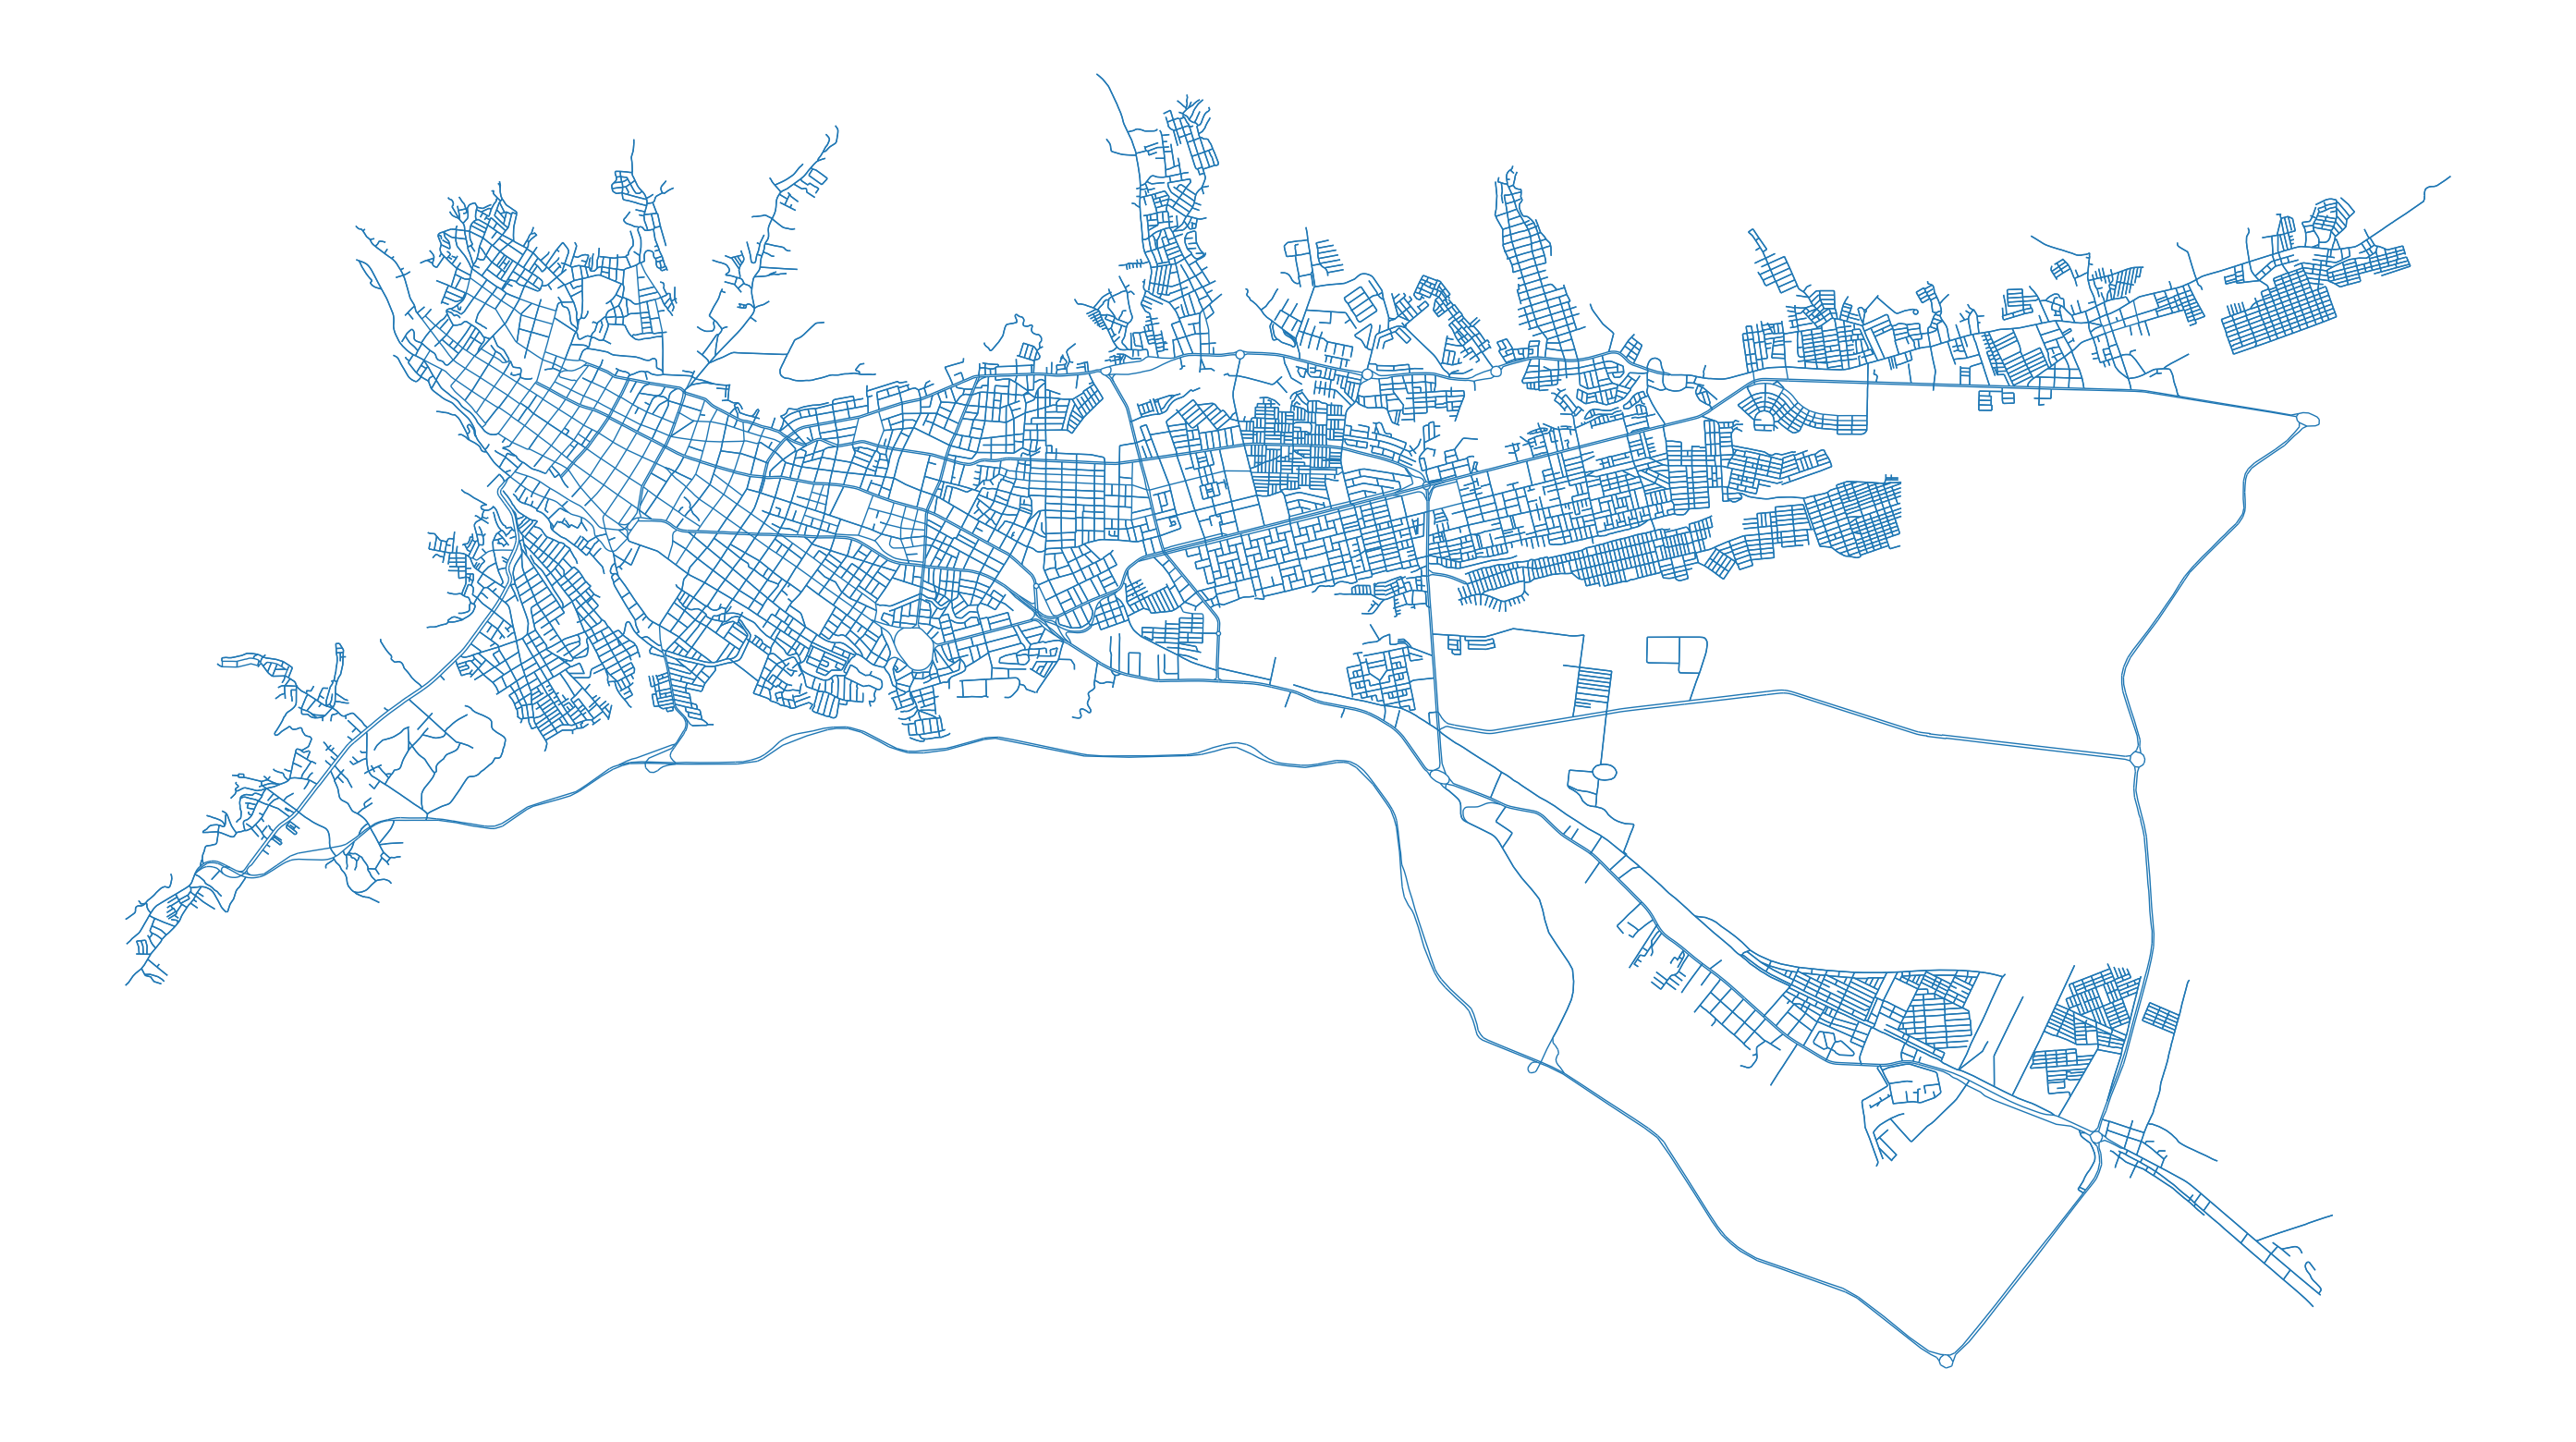

In [3]:
fig, ax = plt.subplots(figsize=(40, 20))
red.plot(ax=ax, linewidth=1)
ax.set_axis_off()
# Guardar la imagen en formato PNG
plt.savefig('mallavialibg.png', format='png', dpi=300)

In [4]:
archivo = pd.read_csv('..\\Programa\\Datos\\nuevo.csv')
archivo

,DIR,NOMENCLATU,CATEGORIA,NOMEN,JER_POT,JER_PMMEP,Long_KM,Shape_Leng,angulo1,angulo2,slope,FID,velocity_k,long_m,TV,geometry,start_lat,start_lon,end_lat,end_lon
0,1,CALLE 20,CALLE-PRIMER-ORDEN,Cl 20,Malla víal local,Malla víal local,0.068802,68.801895,36.123963,36.445994,1.828875,0,22.003983,68.801895,0.187608,LINESTRING (-75.23551099957909 4.4371009997764...,4.437101,-75.235511,4.437603,-75.235145
1,1,CALLE 19,CALLE-PRIMER-ORDEN,Cl 19,Malla víal arterial primaria,Malla víal arterial primaria,0.089808,89.808234,199.524533,216.501489,-4.077699,1,22.026378,89.808234,0.244638,LINESTRING (-75.23516099986428 4.4383420003005...,4.438342,-75.235161,4.437640,-75.235533
2,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial secundari,Colectoras,0.102935,102.934913,302.580455,303.041108,4.033832,2,14.825392,102.934913,0.416589,LINESTRING (-75.23489799990543 4.4397369998130...,4.439737,-75.234898,4.440240,-75.235678
3,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial secundari,0.117046,117.046090,114.747128,114.807639,-5.290759,3,26.063237,117.046090,0.269451,LINESTRING (-75.23583699976534 4.4419580000737...,4.441958,-75.235837,4.441516,-75.234879
4,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial primaria,0.114319,114.318731,117.520102,118.003455,-2.102832,4,35.087447,114.318731,0.195487,LINESTRING (-75.236137000241 4.443464999805958...,4.443465,-75.236137,4.442985,-75.235225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27932,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,312.258774,312.258774,-1.806031,27932,17.543749,19.999996,0.068400,LINESTRING (-75.25594915567848 4.4197993935415...,4.419799,-75.255949,4.419921,-75.256083
27933,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,132.258774,132.258774,1.806031,27933,13.659199,19.999996,0.087853,LINESTRING (-75.25608268464403 4.4199207822956...,4.419921,-75.256083,4.419799,-75.255949
27934,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,186.866659,186.866659,2.216708,27934,13.217541,19.719950,0.089517,LINESTRING (-75.17573942169315 4.4259646688973...,4.425965,-75.175739,4.425788,-75.175760
27935,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,6.866659,6.866659,-2.216708,27935,17.985408,19.719950,0.065786,LINESTRING (-75.1757603993574 4.42578761871231...,4.425788,-75.175760,4.425965,-75.175739


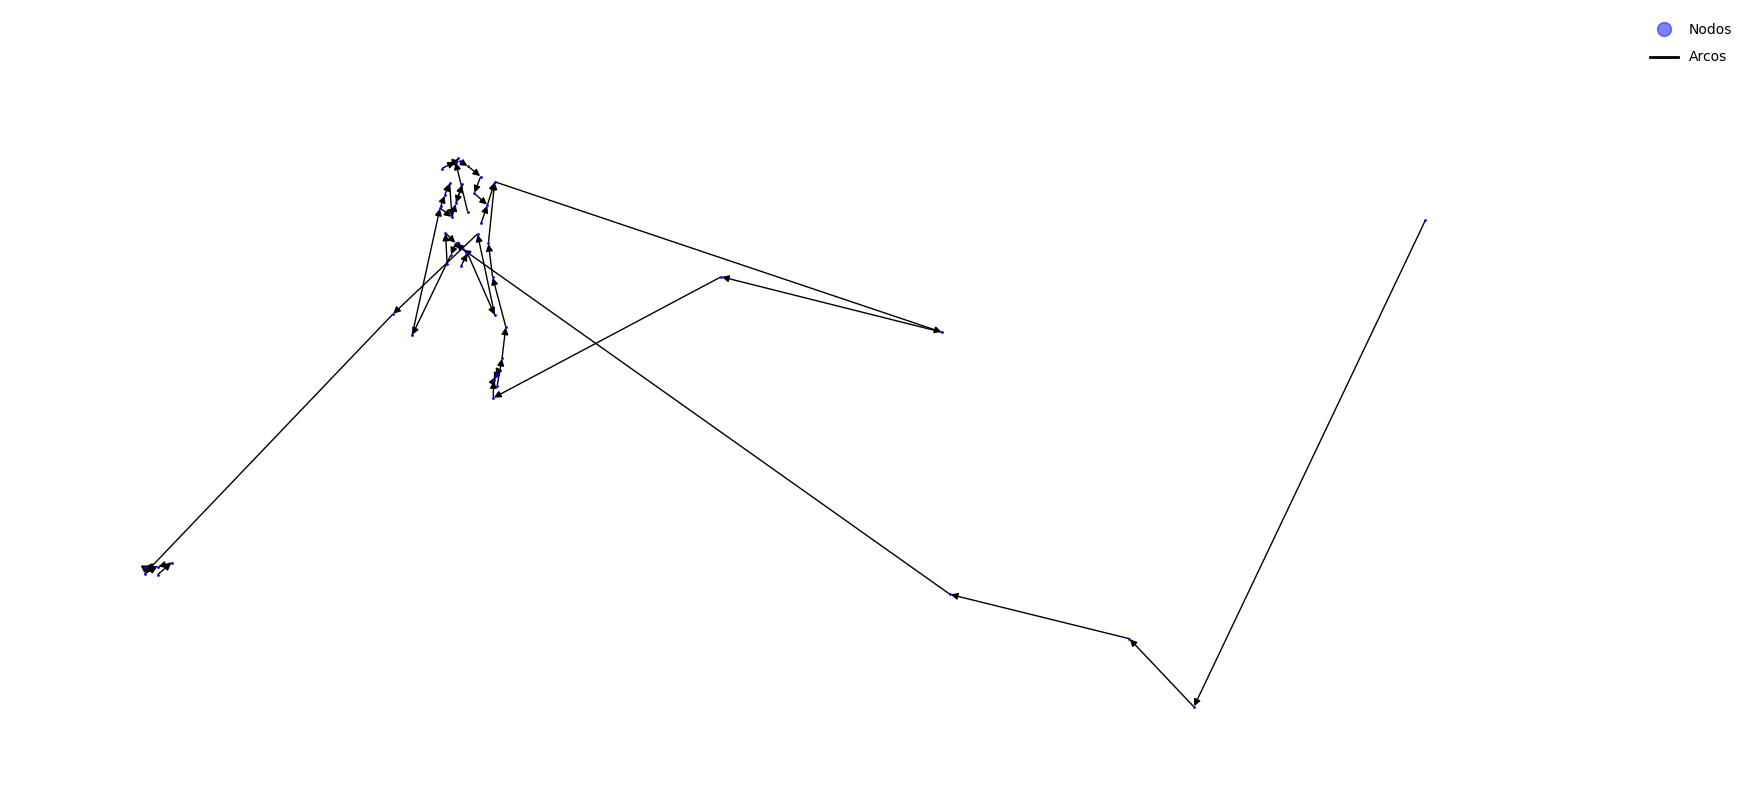

In [12]:
# Crear un grafo vacío con NetworkX
G = nx.DiGraph()

# Obtener la ruta del archivo CSV
ruta_archivo = os.path.join(os.getcwd(), 'Datos', 'nuevo.csv')

# Leer solo las primeras x filas del archivo CSV
archivo = pd.read_csv(ruta_archivo, nrows=50)

# Diccionario para almacenar los nodos existentes con sus coordenadas
nodos_existentes = {}

# Agregar nodos y arcos al grafo
for i, row in archivo.iterrows():
    # Agregar nodo de inicio si no existe en el grafo
    start_lat, start_lon = row['start_lat'], row['start_lon']
    start_node = None
    for node_id, data in G.nodes(data=True):
        if data['lat'] == start_lat and data['lon'] == start_lon:
            start_node = node_id
            break
    if start_node is None:
        start_node = i
        G.add_node(start_node, lat=start_lat, lon=start_lon)
    
    # Agregar nodo de fin si no existe en el grafo
    end_lat, end_lon = row['end_lat'], row['end_lon']
    end_node = None
    for node_id, data in G.nodes(data=True):
        if data['lat'] == end_lat and data['lon'] == end_lon:
            end_node = node_id
            break
    if end_node is None:
        end_node = i+1
        G.add_node(end_node, lat=end_lat, lon=end_lon)
    
    # Agregar la arista al grafo
    G.add_edge(start_node, end_node, weight=row['TV'])

# Crear un GeoDataFrame para nodos
gdf_nodes = gpd.GeoDataFrame(
    {
        'node_id': list(G.nodes),
        'lat': [G.nodes[node]['lat'] for node in G.nodes],
        'lon': [G.nodes[node]['lon'] for node in G.nodes]
    },
    geometry=gpd.points_from_xy([G.nodes[node]['lon'] for node in G.nodes], [G.nodes[node]['lat'] for node in G.nodes]),
    crs='EPSG:4326'
)

# Crear un GeoDataFrame para arcos
gdf_edges = gpd.GeoDataFrame(
    {
        'start_node': [edge[0] for edge in G.edges],
        'end_node': [edge[1] for edge in G.edges],
        'weight': [G.edges[edge]['weight'] for edge in G.edges]
    },
    geometry=[LineString([(G.nodes[edge[0]]['lon'], G.nodes[edge[0]]['lat']),
                     (G.nodes[edge[1]]['lon'], G.nodes[edge[1]]['lat'])]) for edge in G.edges],
    crs='EPSG:4326'
)


# Exportar nodos y arcos a archivos Shapefile en la carpeta "grafo"
gdf_nodes.to_file(os.path.join("Grafo", 'nodos.shp'), driver='ESRI Shapefile')
gdf_edges.to_file(os.path.join("Grafo", 'arcos.shp'), driver='ESRI Shapefile')

# Mostrar el grafo
pos = {node_id: (data['lon'], data['lat']) for node_id, data in G.nodes(data=True)}
fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=1, alpha=1, ax=ax, edge_color='black', node_color='blue', width=1)

# Agregar la leyenda para los nodos
ax.plot([], [], 'o', color='blue', markersize=10, label='Nodos', alpha=0.5)
# Agregar la leyenda para los arcos
ax.plot([], [], '-', color='black', linewidth=2, label='Arcos')
# Mostrar las dos leyendas
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1.05, 1))
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1.05, 1))

ax.set_axis_off()
plt.show()
